In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

In [3]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

# stocks = ["HDFCBANK.NS", "ICICIBANK", "INFY.NS", "RELIANCE.NS", "TCS.NS", "ITC.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "ADANIENT.NS", "ASIANPAINT.NS"]

stocks = ["GHCL.NS","IDFCFIRSTB.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"

In [4]:
stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date,end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices = stock_prices.replace(0,np.nan)
stock_prices=stock_prices.dropna()
stock_prices


,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2016-01-06 00:00:00+05:30,102.618561,55.621262,363.493774,331.177887,427.756409
2016-01-07 00:00:00+05:30,94.313248,53.839455,341.290741,325.034943,423.381042
2016-01-08 00:00:00+05:30,99.144707,53.068943,351.026306,321.791443,425.328033
2016-01-11 00:00:00+05:30,98.984978,51.913177,357.831268,321.889740,417.189850
2016-01-12 00:00:00+05:30,99.464142,50.564785,352.665436,326.116028,420.033905
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,604.692566,94.300003,616.796631,1058.658936,503.328888
2023-09-26 00:00:00+05:30,607.335083,95.550003,617.893188,1064.390625,508.118286
2023-09-27 00:00:00+05:30,608.901062,97.550003,618.242188,1078.445557,500.445435


In [16]:
log_returns = np.log(stock_prices/stock_prices.shift(1))
log_returns=log_returns.replace(-np.inf,np.nan)
log_returns = log_returns.dropna()
log_returns

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2016-01-07 00:00:00+05:30,-0.084397,-0.032559,-0.063027,-0.018723,-0.010281
2016-01-08 00:00:00+05:30,0.049959,-0.014415,0.028126,-0.010029,0.004588
2016-01-11 00:00:00+05:30,-0.001612,-0.022019,0.019200,0.000305,-0.019319
2016-01-12 00:00:00+05:30,0.004829,-0.026317,-0.014542,0.013044,0.006794
2016-01-13 00:00:00+05:30,-0.018230,-0.023122,0.026683,-0.020861,0.030670
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.017965,0.007451,-0.002825,0.000565,-0.004456
2023-09-26 00:00:00+05:30,0.004360,0.013168,0.001776,0.005400,0.009470
2023-09-27 00:00:00+05:30,0.002575,0.020715,0.000565,0.013118,-0.015216


In [18]:
print(log_returns.mean()*NUM_TRADING_DAYS) #average annual returns

GHCL.NS          0.233403
IDFCFIRSTB.NS    0.071283
TATAMOTORS.NS    0.072157
NH.NS            0.156124
EMAMILTD.NS      0.027338
dtype: float64


In [19]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS)) #annual volatility

GHCL.NS          0.414652
IDFCFIRSTB.NS    0.392803
TATAMOTORS.NS    0.439411
NH.NS            0.316856
EMAMILTD.NS      0.323711
dtype: float64


In [9]:
portfolio_weights =[]
portfolio_returns =[]
portfolio_risks =[]

for i in range(NUM_SIMULATIONS):    
    w= np.random.random(5)
    w=w/np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risks = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risks)


In [20]:
risk_free_rate =0.07

In [22]:
portfolio_weights = np.array(portfolio_weights)
portfolio_risks = np.array(portfolio_risks)
portfolio_returns = np.array(portfolio_returns)

sharpe_ratios = (portfolio_returns-risk_free_rate)/portfolio_risks
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

In [23]:
portfolios

,Return,Risk,Sharpe
0,0.125936,0.255946,0.218546
1,0.078973,0.269172,0.033336
2,0.103481,0.227122,0.147417
3,0.088697,0.237312,0.078787
4,0.149614,0.266380,0.298873
...,...,...,...
99995,0.115315,0.280806,0.161375
99996,0.085967,0.232840,0.068575
99997,0.126877,0.262562,0.216623
99998,0.135805,0.231027,0.284835


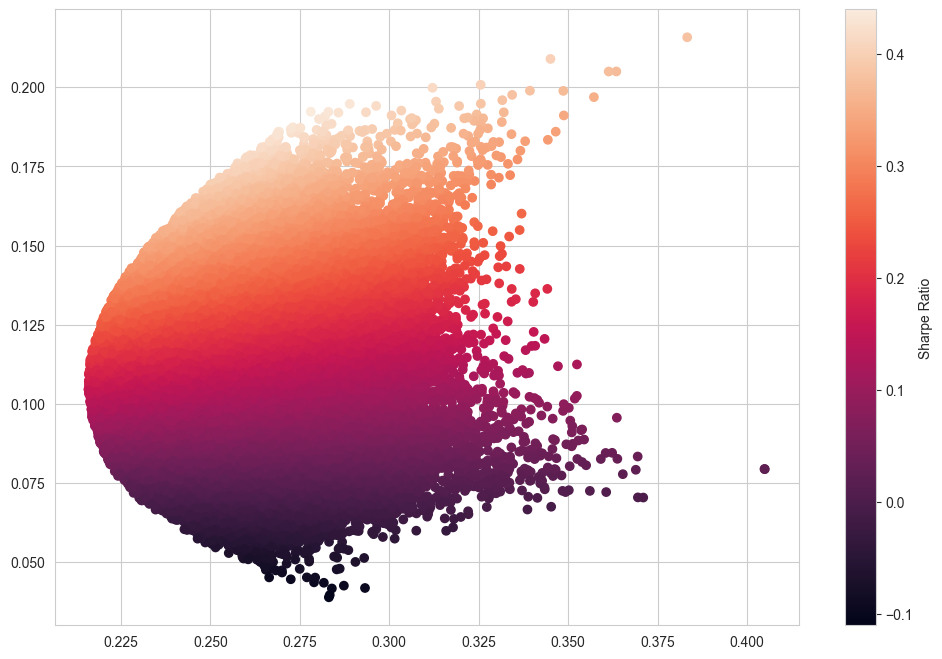

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

In [14]:
ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i 

In [25]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.3803992733707013
Corresponding Return =   0.2157873722893582
Corresponding Risk =   0.38324829329336696


In [26]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.8945016569773592
IDFCFIRSTB.NS : 0.016252577859159432
TATAMOTORS.NS : 0.049237861655257294
NH.NS : 0.0093407984005323
EMAMILTD.NS : 0.0306671051076918


In [34]:
ind_risk = 0

for i in range(len(portfolio_risks)):
    if(portfolio_risks[i] == np.amin(portfolio_risks)):
        ind_risk = i

In [35]:
print("Minimum Risk = ",portfolio_risks[ind_risk])
print("Corresponding Return =  ",portfolio_returns[ind_risk])

Minimum Risk =  0.21593401465466508
Corresponding Return =   0.10456602353811216


In [36]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind_risk][i])

GHCL.NS : 0.10047336000739251
IDFCFIRSTB.NS : 0.12934254005393758
TATAMOTORS.NS : 0.060947204174668757
NH.NS : 0.37355211155434787
EMAMILTD.NS : 0.3356847842096532


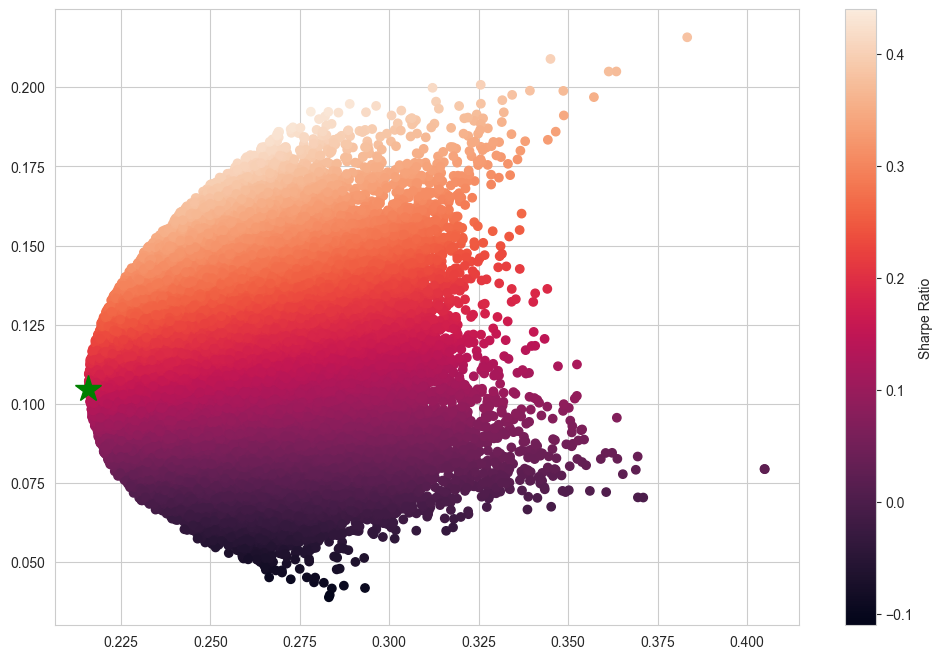

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind_risk],portfolio_returns[ind_risk], 'g*',markersize = 20.0)


plt.show()